# 4. Regresja

Regrasja polega na stworzeniu modelu opisującego zależność między zmiennymi. Posiadając taki model możemy przewidywać wartość  jednej zmiennej ciągłej na podstawie innych zmienneych. 

Poniższy notatnik demonstruje:
1. Metody regresji liniowej i wielomianowej z użyciem pakietu scikit-learn
2. Tworzenie modelu (fit), predykcję wartości (predict) oraz ocenę jakości predykcji (MSE. R-score)
3. Problem przeuczenia (overfitting) oraz sposoby redukcji tego problemu za pomocą regularyzacji


## Generowanie danych 

Stworzymy najpierw sztuczne dane, na których zbudujemy model regresyjny


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Zainicjalizujmy najpierw ziarno dla funkcji losującej, aby za każdym razem otrzymać *te same* ale losowe dane. Często się to przydaje gdy operujemy na losowych danych, ale chcemy zagwarantować powtarzalność wyników. 

In [ ]:
np.random.seed(0)

Zdefinujmy funkcję `true_function()`, która posłuży do wygenerowania danych do których będziemy dopasowywali nasz model. 

In [ ]:
def true_function(x):
    return np.cos(1.5 * np.pi * x)

Wygenerujmy próbkę danych `x` oraz wyznaczmy wartości funkcji `y` dla tych danych. 
Będziemy szukać zależności `x ~ y`


In [ ]:
n_samples = 30
x = np.sort(np.random.rand(n_samples, 1))
y = true_function(x) 


Narysujmy tą funkcję oraz wygenerowane punkty.

In [ ]:
#przedział do 'gęstego' narysowania funkcji,
x_range = np.linspace(0, 1, 100)

# operacja reshape tworzy transpozycje wektora, otrzymujemy macierzy o wymiarach (100, 1), 
# taka postać jest wymagana później przez model regresyjny LinearRegression()
x_range = np.reshape(x_range, (100, 1))

plt.plot(x_range, true_function(x_range))
plt.plot(x, y, 'ro')
plt.show()

Dodajmy trochę szumu do danych aby utrudnić problem dopasowania modelu w naszym przykładzie. 

In [ ]:
y = true_function(x) + np.random.randn(n_samples, 1) * 0.1

plt.plot(x_range, true_function(x_range))
plt.plot(x, y, 'ro')
plt.show()


## Model liniowy

Dopasujmy do naszych danych model liniowy dla jednej zmiennej 

$$ f(x) = x w_1 + w_0 $$

Zadanie polega na znalezieniu takich parametrów $w_1$ i $w_0$ definiujących linię aby błąd popełniany przez tą funkcję był jak najmniejszy, tzn. chcemy aby punkty danych leżały w jak najmniejszej odległości od dopasowanej linii.  Funkcja kosztu (błędu) to suma kwadratów różnic między punktem prawdziwym $y_i$ a tym uzyskanym z modelu $f(x_i)$:

$$L(y, f(x,w)) = \sum_{i=1}^N \|y_i - f(x_i)\|^2,$$

Zadanie polega więc na znalezieniu takich $w_1$ i $w_0$, które minimalizują wartość błędu $L$. W celu wyznaczenia tego minimum wykorzystamy algorytm regresji liniowej dostępny w pakiecie scikit-learn [LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Narzędzie to słóży do regrasji liniowej wielowymiarowej i w ogólności poszukuje modelu 

$$f(x) = x_1 w_1 + x_2 w_2 + \ldots + x_k w_k = x^T w + w_0$$

gdzie dla $k$ zmiennych $w$ jest wektorem $[w_1, w_2, \ldots, w_k]$ i wraz z wyrazem wolnym $w_0$ są szukanymi współczynnikami określającymi liniową zależność. 


In [ ]:
from sklearn import linear_model

# Tworzymy obiekt realizujący liniową regresję
regr = linear_model.LinearRegression()

# Dopasowanie modelu do danych (poszukiwanie minimum funkcji błedu)
regr.fit(x, y)

# Wyznaczone wspólczynniki regresji
a = regr.coef_[0]
b = regr.intercept_

print("f(x) = %f x + %f" % (a, b))


Metoda predict() pozwala wyznaczyć przewidywaną wartość zmiennej wyjściowej dla dowonych wartości wejściowych `x` 

In [ ]:
y_pred = regr.predict(x_range)

# co sprowadza w tym przypadku do operacji
y_lin = a * x_range + b      # model liniowy zalezosci X ~ Y

np.alltrue(y_pred == y_lin)

plt.plot(x_range, true_function(x_range), label='true function')
plt.plot(x_range, y_pred, 'g--', label='linear regression')
plt.plot(x, y, 'ro', label='points to fit')
plt.legend()
plt.show()



## Regresja wielomianowa

Model liniowy w tym przypadku jest daleki od ideału. Spróbujmy dopasować do danych funkcję wielomianową.

$$ f(x) = x^k w_k + x^{k-1} w_{k-1} + \ldots + x_1 w_1 + w_0 $$

gdzie $k$ określa stopiwn wielomianu. Dla $k=1$ otrzymamy znowu model liniowy, dla $k=2$ parabolę, itd.

Jak widać sprowadza się to do znalezienia wspólczynników $w_i$ liniowego modelu dla $k$ zmiennych, gdzie zmienne są postaci $x, x^2, \ldots, x^k$.

Wykorzystajmy funkcję [PolynomialFeatures()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) do przekształcenia danych $x$ do takiej postaci. Na początek znajdzmy model liniowy dla zmiennych $x^2$ i $x$, co odpowiada dopasowaniu wielomianu 2 stopnia $f(x) = w_2 x^2 + w_1 x + w_0$


In [ ]:
from sklearn.preprocessing import PolynomialFeatures 

# regresja wielomianem stopnia 2 
poly2 = PolynomialFeatures(degree = 2) 
x_poly2 = poly2.fit_transform(x) 
regr2 = linear_model.LinearRegression()
regr2.fit(x_poly2, y)

plt.plot(x_range, true_function(x_range), label='true function')
plt.plot(x_range, regr2.predict(poly2.fit_transform(x_range)),'g--', label='regression degree=2')
plt.plot(x, y, 'ro', label='points to fit')
plt.legend()
plt.show()


Wynik wygląda lepiej. Spróbujmy dopasować wielomian wyższego rzędu.

In [ ]:
poly3 = PolynomialFeatures(degree = 3) 
x_poly3 = poly3.fit_transform(x) 
regr3 = linear_model.LinearRegression()
regr3.fit(x_poly3, y)

plt.figure(figsize=(10,8))

plt.plot(x_range, true_function(x_range), label='true function')
plt.plot(x_range, regr2.predict(poly2.fit_transform(x_range)), 'g--', label='regression d=2')
plt.plot(x_range, regr3.predict(poly3.fit_transform(x_range)), 'm--', label='regression d=3')
plt.plot(x, y, 'ro', label='points to fit')
plt.legend()
plt.show()


Wygląda na to, że jeśli będziemy dopasowywać wielomian coraz wyższego stopnia, otrzymamy coraz lepszą aproksymację danych. Niemniej jednak zwiększanie stopnia wielomianu, a co za tym idzie 'poziomu skomplikowania' naszego modelu, będzie powodować zbyt duże dopasowanie się do danych i zbyt małe możliwości generalizacji modelu. W szczególności możemy mówić o dwóch fenomenach jeżeli uczymy się parametrów modelu z danych:

+ *model underfit* czyli model jest zbyt 'prosty' aby uchwycić zależności między danymi
+ *model overfit* (przeczenie) parametry naszego modelu 'nauczyły' się szumu

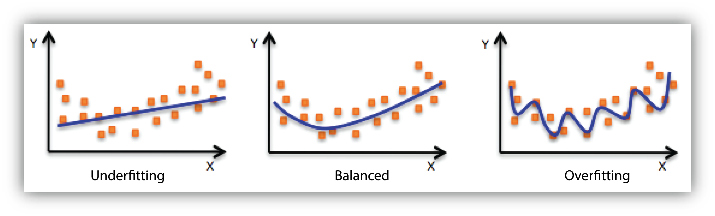

Istnieje zatem całkiem duże prawdopodobieństwo, że zwiększając stopień wielomianu dopasowaliśmy wielomian do szumu. Aby to zilustrować weźmy wielomian 16-go stopnia:

In [ ]:
poly16 = PolynomialFeatures(degree = 16)
x_poly16 = poly16.fit_transform(x)
regr16 = linear_model.LinearRegression() 
regr16.fit(x_poly16, y)

plt.figure(figsize=(10,8))

plt.plot(x_range, true_function(x_range), label='true function')
plt.plot(x_range, regr16.predict(poly16.fit_transform(x_range)), 'b--', label='regression d=16 (overfitted)')
plt.plot(x, y, 'ro', label='points to fit')
plt.ylim((-1.2, 1.7))
plt.legend()
plt.show()

print('%d współczynników regresji: %s'  % ( len(regr16.coef_[0]), str(regr16.coef_[0])))


## Ocena modelu

Podstawową miarą służącą do oceny modelu regresyjnego jest średnia wartość funkcji kosztu, czyli tzw. **błąd średniokwadratowy MSE** (_mean square error_):

$$ MSE = \frac{1}{n} \sum_{i=1}^n \left( y_i - f(x_i) \right)^2 $$

W przypadku idealnego dopasowania, gdy wszystkie $y_i$ są bezbłędnie dopasowane przez funkcję $f(x_i)$, bład MSE ma wartość 0. 

Drugą powszechnie używaną miarą oceny jest **współczynnik determinacji $R^2$**:

$$ R^2 = \frac{\sum_{i=1}^n \left( f(x_i) - \bar{y}_i\right)^2}{\sum_{i=1}^n \left( y_i - \bar{y}_i\right)^2} > 0$$

gdzie $\hat{y}$ to średnia wartość odpowiedzi $y_i$ dla wszystkich punktów w danych $i=1,\ldots,n$. 
Im większa wartość współczynnika $R^2$ tym lepsze dopasowanie $f(x)$ do danych. W przypadku bezbłędnego dopasowania $R^2=1$.

Wyznaczmy wartości MSE i $R^2$ dla uzyskanych wcześniej modeli regresyjnych korzystając odpowiednich z metryk dostępnych  w pakiecie `scikit-learn`

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = regr.predict(x)
y_regr2_pred = regr2.predict(poly2.fit_transform(x))
y_regr3_pred = regr3.predict(poly3.fit_transform(x))
y_regr16_pred = regr16.predict(poly16.fit_transform(x))

import pandas as pd
import seaborn as sb

columns = ['Model', 'MSE', 'R2']

data = pd.DataFrame(columns=columns)
data.loc[0] = ['linear',   mean_squared_error(y, y_pred),        r2_score(y, y_pred)        ] 
data.loc[1] = ['poly 2',   mean_squared_error(y, y_regr2_pred),  r2_score(y, y_regr2_pred)  ] 
data.loc[2] = ['poly 3',   mean_squared_error(y, y_regr3_pred),  r2_score(y, y_regr3_pred)  ] 
data.loc[3] = ['poly 16',  mean_squared_error(y, y_regr16_pred), r2_score(y, y_regr16_pred) ] 

data

In [ ]:
sb.barplot(data=data, x='Model', y='MSE')
plt.show()
sb.barplot(data=data, x='Model', y='R2')
plt.show()

Obliczanie błędu MSE na danych `(X, Y)`, na których dokonano dopasowania modelu nie jest wiarygodną oceną. Widać, że model najbardziej złożony i przeuczony ma najmniejszy błąd MSE. Znając prawdziwą funkcję, możemy obliczyć błąd popełniany przez model, jednak w rzeczywistych zastosowaniach nie mamy dostępu do prawdziwej funkcji, gdyż to właśnie tą funkcję próbujemy odkryć. Potrzebujemy danych do testowania. W przypadku, gdy mamy do dyspozycji dużo danych wejściowych możemy je podzielić na część treningową oraz część testową. Wówczas model dopasowany na zbiorze treningowym może zostać oceniony na części testowej, która nie została użyta do stworzenia modelu. Jeżeli model regresyjny będzie posiadał mały błąd również na danych testowych to znaczy, że znaleźliśmy ogólną regułę, prawdziwą dla tego typu danych.

Załóżmy, że posiadamy osobny fragment naszych wygenerowanych danych, który nie brał udziału w tworzeniu modelu. W naszym przypadku wygenerujemy nowe obserwacje, które posłużą w roli zbioru testowego.

In [ ]:
x_test = np.sort(np.random.rand(100, 1))
y_test = true_function(x_test) + np.random.randn(100, 1) * 0.1

Dokonajmy oceny na zbiorze tesowym

In [ ]:
y_test_pred = regr.predict(x_test)
y_regr2_test_pred = regr2.predict(poly2.fit_transform(x_test))
y_regr3_test_pred = regr3.predict(poly3.fit_transform(x_test))
y_regr16_test_pred = regr16.predict(poly16.fit_transform(x_test))

mse_test = [ 
     mean_squared_error(y_test, y_test_pred),
     mean_squared_error(y_test, y_regr2_test_pred),
     mean_squared_error(y_test, y_regr3_test_pred),
     mean_squared_error(y_test, y_regr16_test_pred)
]

data['MSE test'] = mse_test

sb.barplot(data=data, x='Model', y='MSE test')

data

Jak można było się spodziewać model o największej złożoności (wielomian stopnia 16) ma największy błąd na zbiorze testowym. Na zbiorze treningowym jego błąd był bardzo mały, to znaczy, że model jest przeuczony i zbytnio dopasował się do danych w zbiorze uczącym. Najlepszą generalizację (zdolność do popranego przewidywania `y` na nowych danych) w tym wypadku miała regresja wielomianowa stopnia 3.


## Regularyzacja

Metody regularyzacji mają za zadanie zminimalizować ryzyko przeuczenia modelu. W przypadku regresji powszechnie stosowanym podejściem jest dodanie do funkcji kosztu $L$ dodatkowego członu, który będzie wymuszał zmniejszanie wartości wag $w_i$. W szczególnym wypadku, gdy waga zmaleje do zera $w_i=0$ można uznać, że zmienna $i$-ta jest nieistotna dla modelowanej zależności (czynnik $w_i x_{ij}$ zanika). W ten sposób wymuszając zmniejszanie wartości wag w trakcie optymalizacji preferowane są modele o mniejszej złożoności (część wag $w_i$ zaniknie lub będzie miała małe wartości).

### Regresja grzbietowa

Regresja grzbietowa (_Ridge regression_) polega poszukiwaniu parametrów $w_i$ poprzez minimalizację poniższej funkcji kosztu
$$L_{\textrm{ridge}} = \sum_{i=1}^N \|y_i - f(x_i)\|^2 + \alpha \|w\|^2 $$

gdzie $\alpha > 0$ jest parametrem określającym siłę regularyzacji. Dla $\alpha=0$ człon regularyzacyjny zanika i regresja grzbietowa zamienia się w zwykła regresję liniową. Zazwyczaj $\alpha$ jest małą wartością dodatnią np. 0.01.
Minimalizacja powyższej funkcji kosztu dąży do minimalizacji błędu MSE (pierwszy człon) oraz do zanikania wartości wag (drugi człon).

Spróbujmy zobaczyć jaki wynik uzyskamy dla regresji wielomianowej stopnia 16 w naszym przypadku, gdy zastosujemy regularyzację.

In [ ]:
from sklearn import linear_model

ridge = linear_model.Ridge(alpha=0.02)
ridge.fit(x_poly16, y)

plt.figure(figsize=(10, 8))

plt.plot(x_range, true_function(x_range), label='true function')
plt.plot(x_range, ridge.predict(poly16.fit_transform(x_range)), 'b--', label='ridge regression')
# plt.plot(x_range, regr16.predict(poly16.fit_transform(x_range)), 'g--', label='poly 16')
plt.plot(x, y, 'ro', label='points to fit')
plt.ylim((-1.2, 1.7))
plt.legend()
plt.show()


In [ ]:
y_ridge_pred_test = ridge.predict(poly16.fit_transform(x_test))
y_ridge_pred_train = ridge.predict(poly16.fit_transform(x))
                             
data.loc[4] = ['ridge',  
               mean_squared_error(y, y_ridge_pred_train), 
               r2_score(y, y_ridge_pred_train),
               mean_squared_error(y_test, y_ridge_pred_test)] 
data

In [ ]:
sb.barplot(data=data, x='Model', y='MSE test')

Błąd na zbiorze testowym wskazuje, że dopasowanie wielomianu stopnia 16 do naszego przykładu z zastosowaniem regularyzacji grzbietowej osiągnął zbliżony wynik do wielomianu stopnia 3. 

Zobaczmy jak wyglądają wartości bezwzględne uzyskanych parametrów $w_i$ dla modelu z regularyzacją i bez regularyzacji.

In [ ]:
print('Suma wartości wag modelu z regularyzacją grzbietową:', np.absolute(ridge.coef_[0]).sum())
print('Suma wartości wag modelu bez regularyzacji:', np.absolute(regr16.coef_[0]).sum())

### Regresja Lasso

Regresja metodą Lasso jest bardzo podobna do regresji grzbietowej, jednak zamiast normy $L_2$ w czynniku regularyzacyjnym występuje norma $L_1$:

$$L_{\textrm{lasso}} = \sum_{i=1}^N \|y_i - f(x_i)\|^2 + \alpha \|w\|_1 $$

Tego typu regularyzacja również preferuje rozwiązania z małymi wartościami wag, jednak w odróżnieniu od regresji grzbietowej otrzymana reprezentacja jest "rzadsza", tzn. większa liczba  spółczynników $w_i$ jest redukowanych do 0.

Wykonajmy ponownie dopasowanie wielomianem stopnia 16 tym razem z regularyzacją Lasso

In [ ]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.01)
lasso.fit(x_poly16, y)
y_pred_train_lasso = lasso.predict(poly16.fit_transform(x))
y_pred_test_lasso = lasso.predict(poly16.fit_transform(x_test))

plt.figure(figsize=(10, 8))

plt.plot(x_range, true_function(x_range), label='true function')
plt.plot(x_range, lasso.predict(poly16.fit_transform(x_range)), 'b--', label='lasso regression')
# plt.plot(x_range, regr16.predict(poly16.fit_transform(x_range)), 'g--', label='poly 16')
plt.plot(x, y, 'ro', label='points to fit')
plt.ylim((-1.2, 1.7))
plt.legend()
plt.show()                        



In [ ]:
data.loc[5] = ['lasso',  
               mean_squared_error(y, y_pred_train_lasso), 
               r2_score(y, y_pred_train_lasso),
               mean_squared_error(y_test, y_pred_test_lasso)] 

sb.barplot(data=data, x='Model', y='MSE test')
data

Uzyskany wynik jest gorszy od modelu regresji grzbietowej ale jest też o wiele lepszy od modelu, który nie był poddany regularyzacji. Odpowiedni dobór siły regularyzacji $\alpha$ powinien pozwolić uzyskać wynik zbliżony a może i lepszy od regresji grzbietowej. Zobaczmy jeszcze jak wyglądają wartości współczynników uzyskanych obiema metodami regularyzacji.

In [ ]:
print('Współczynniki regresji modelu lasso')
print(ridge.coef_)

print('Współczynniki regresji modelu lasso')
print(lasso.coef_)


W przypadku regularyzacji Lasso tylko 3 współczynniki są niezerowe, tzn. tylko te 3 zmienne wystarczą do uzyskania predykcji wartości `y` przy zachowaniu niewielkiego błędu.

## Zadanie 

Pod adresem https://www.fizyka.umk.pl/~grochu/wdm/files/diabetes.csv znajduje się plik zawierający dane `n=442` pacjentów chorych na cukrzycę (`diabetes`). Każdy przypadek opisany jest 10 zmiennymi numerycznymi:  wiek (`AGE`), płeć (`SEX`), wskaźnik masy ciała (`BMI`), średnie ciśnienie krwi (`BP`) i sześć pomiarów surowicy krwi (`S1 S2 S3 S4 S5 S6`). Ostatnia kolumna (zmienna `Y`) zawiera wartości określające stopnień zaawansowania choroby. Zadanie polega na zbudowaniu modeli regresji liniowej przewidujących wartość zmiennej `Y` zgodnie z poniższymi wytycznymi.

1. Wczytaj plik i sprawdź, czy w danych występują braki oraz sprawdź, czy wszystkie zmienne są wartościami numerycznymi. Jeżeli zajdzie potrzeba usuń obserwacje zawierające braki a zmienne przetransformuj do postaci numerycznej.
2. Podziel dane na dwie części: treningową zawierającą 75% przypadków i testową zawierającą pozostałe 25% przypadków.   
Modele regresji będą budowane wyłącznie na części treningowej.  
Do podziału danych możesz wykorzystać funkcję [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) z pakietu scikit-learn.

3. Sporządź wykres parowy [pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html) zbioru treningowego i na jego podstawie wybierz jedną zmienną, która wydaje się posiadać liniową zależność względem zmiennej wyjściowej `Y`. Zbuduj model regresji liniowej dla wybranej zmiennej i wyznacz błąd MSE predykcji `Y` na zbiorze treningowym oraz na zbiorze testowym.
4. Zbuduj model regresji liniowej wielowymiarowej uwzględniając wszystkie zmienne do opisu zmiennej wyjściowej `Y`. Zastosuj w tym celu jedną, wybraną metodę z regularyacją (np. grzbietową lub Lasso). Przeprowadź obliczenia dla przynajmniej 2 róznych wartości współczynnika określającego siłę regularyzacji $\alpha$ i porównaj wyniki. 
5. Spośród wszystkich stworzonych modeli regresji wybierz najlepszy (ten o najmniejszym MSE na zbiorze testowym) i wypisz jego współczynniki regresji.


